<a href="https://colab.research.google.com/github/001hazel/Phys-134/blob/main/Muon_Physics_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Muon Lifetime Data Analysis

In the experiment we measured detected lifetimes of muons moving through a scintillator. These measured lifetimes are to be binned into data and fitted to a model of the from:

$ y(t_{j}) = Ae^{-t_{j}/τ} + B$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import scipy.optimize
import scipy as sp
import scipy.stats as stat

In [3]:
from google.colab import files
uploaded = files.upload()

Saving trial 1.csv to trial 1.csv


### Data Analysis for Trial 1

In [4]:
data = np.loadtxt('trial 1.csv')

In [5]:
print(data)

[ 580. 7940. 2240. ...  980.  160. 4600.]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

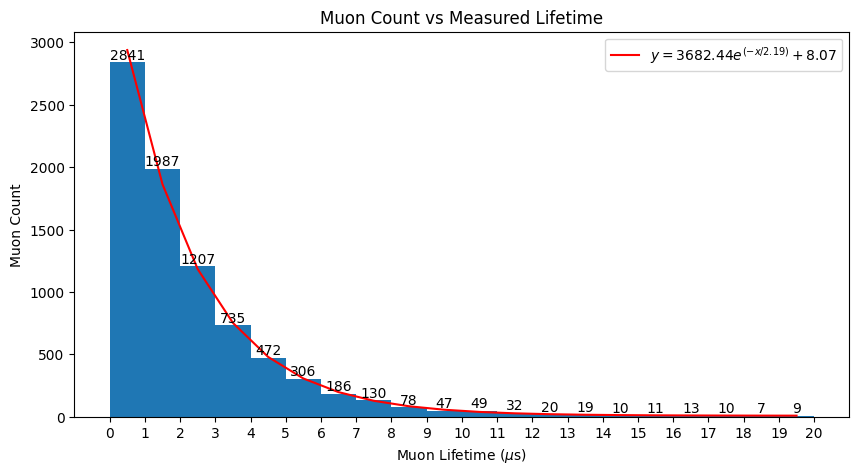

In [37]:
plt.figure(figsize=(10,5))
#plt.hist(data/1000,bins=20,range=(0,20))
plt.xticks(np.linspace(0,20,21))
bins,edges,bars = plt.hist(data/1000,bins=20,range=(0,20))
plt.bar_label(bars)
plt.plot(bincenters,fit_data,color='r',label = r'$y={:.2f}e^{{(-x/{:.2f})}}+{:.2f}$'.format(params[0],params[2],params[1]))
plt.legend()
plt.title('Muon Count vs Measured Lifetime')
plt.xlabel('Muon Lifetime ($\mu$s)')
plt.ylabel('Muon Count')
plt.savefig('Trial 1 Graph.png')
files.download('Trial 1 Graph.png')
plt.show()


In [8]:
print(bins)

[2841. 1987. 1207.  735.  472.  306.  186.  130.   78.   47.   49.   32.
   20.   19.   10.   11.   13.   10.    7.    9.]


In [9]:
print(edges)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]


In [10]:
bincenters = (edges[1:]+edges[:-1])/2
print(bincenters)

[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5]


In [11]:
error = np.sqrt(bins)

In [12]:
def fitmodel(x,A,B,Tau):
  return A*np.exp(-1*x/Tau)+B

params,covariance = scipy.optimize.curve_fit(fitmodel,bincenters,bins,p0=None,sigma=error,absolute_sigma=True)



In [13]:
fit_data = fitmodel(bincenters,*params)

In [42]:
print('N = ',np.sum(bins))

N =  8169.0


Here are the paramaters for the model of trial 1, along with the p-value for the calculated $\tau$ value

In [17]:
for i in range(0,len(params)):
    print('param ',i,' = ',params[i], '+/-', np.sqrt(covariance[i,i]))

param  0  =  3682.441687002913 +/- 61.502164996778596
param  1  =  8.06578556567896 +/- 1.216380447397839
param  2  =  2.188158936913787 +/- 0.02889985434326564


In [126]:
#calculating the observed lifetime taking into account negatively charged muons
tau_obs = 2*(2.043*2.19703)/(2.19703+2.043)
term1 = -2*2.19703/(2.043+2.19704)**2
term2 = -2*2.043/(2.043+2.19703)**2
tau_obs_error = np.sqrt((term1*0.003)**2+(term2*0.00004)**2)
print('tau_obs = {} +/- {}'.format(tau_obs,tau_obs_error))

tau_obs = 2.1172172319535476 +/- 0.0007332983515409899


In [78]:
tau_measured = params[2]
tau_stdev = np.sqrt(covariance[2,2])
tau_exp = 2.19703
tau_exp_err = 0.00004
z_score = (tau_measured-tau_obs)/np.sqrt(tau_stdev**2+tau_obs_error**2)
z_score_exp = (tau_measured-tau_exp)/np.sqrt(tau_stdev**2+tau_exp_err**2)


In [79]:
#using observed lifetime with negative muon
cdf = stat.norm.cdf(z_score,0,1)

print ("CDF = ",stat.norm.cdf(z_score,0,1))

if cdf>0.5:
    pvalue_2t = 2*(1-cdf)
else :
    pvalue_2t=2*(cdf)

print ("two tailed p-value = ",pvalue_2t)

CDF =  0.9929352239304226
two tailed p-value =  0.0141295521391549


In [80]:
#using regular lifetime
cdf = stat.norm.cdf(z_score_exp,0,1)

print ("CDF = ",stat.norm.cdf(z_score_exp,0,1))

if cdf>0.5:
    pvalue_2t = 2*(1-cdf)
else :
    pvalue_2t=2*(cdf)

print ("two tailed p-value = ",pvalue_2t)

CDF =  0.3794374979982894
two tailed p-value =  0.7588749959965788


$\chi^2$ test for trial 1

In [57]:
chisquare = np.sum((bins-fit_data)**2/error**2)
ndf = len(bins)-len(params)
print('chi-squared = {}, degrees of freedom = {}'.format(chisquare,ndf))
print('p-value =',1-stat.chi2.cdf(chisquare,df=ndf))

chi-squared = 20.46935133321079, degrees of freedom = 17
p-value = 0.2509290193916389


### Data Analysis for Trial 2

In [30]:
files.upload()

Saving trial 2 Apr 10-Apr12.csv to trial 2 Apr 10-Apr12.csv


{'trial 2 Apr 10-Apr12.csv': b'1940\r\n2360\r\n17380\r\n2840\r\n3740\r\n1900\r\n100\r\n460\r\n360\r\n1160\r\n1460\r\n1960\r\n600\r\n380\r\n620\r\n1420\r\n1840\r\n2720\r\n320\r\n160\r\n7960\r\n12540\r\n2260\r\n4520\r\n1800\r\n5880\r\n160\r\n360\r\n5400\r\n2160\r\n1360\r\n1460\r\n580\r\n600\r\n320\r\n720\r\n720\r\n2920\r\n4400\r\n4620\r\n19540\r\n440\r\n1280\r\n260\r\n1240\r\n840\r\n980\r\n1940\r\n660\r\n500\r\n1240\r\n8720\r\n2020\r\n6280\r\n320\r\n6740\r\n640\r\n480\r\n340\r\n320\r\n160\r\n1320\r\n760\r\n4120\r\n2880\r\n640\r\n18140\r\n1680\r\n1720\r\n4280\r\n11940\r\n2860\r\n960\r\n1480\r\n4880\r\n800\r\n120\r\n400\r\n2880\r\n100\r\n7040\r\n5680\r\n1800\r\n2800\r\n2120\r\n4680\r\n100\r\n100\r\n100\r\n120\r\n100\r\n120\r\n100\r\n100\r\n120\r\n120\r\n100\r\n100\r\n100\r\n120\r\n120\r\n120\r\n100\r\n120\r\n120\r\n120\r\n100\r\n120\r\n120\r\n120\r\n120\r\n100\r\n100\r\n100\r\n120\r\n100\r\n100\r\n100\r\n120\r\n120\r\n120\r\n120\r\n120\r\n100\r\n100\r\n100\r\n100\r\n120\r\n120\r\n120\r\n10

In [31]:
data2 = np.loadtxt('trial 2 Apr 10-Apr12.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

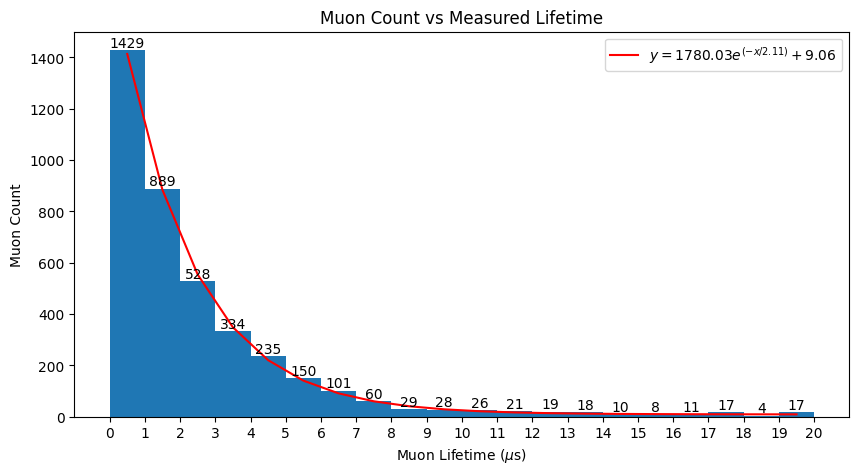

In [45]:
plt.figure(figsize=(10,5))
plt.xticks(np.linspace(0,20,21))
bins2,edges2,bars2 = plt.hist(data2/1000,bins=20,range=(0,20))
plt.bar_label(bars2)
plt.plot(bincenters,fit_data2,color='r',label = r'$y={:.2f}e^{{(-x/{:.2f})}}+{:.2f}$'.format(params2[0],params2[2],params2[1]))
plt.legend()
plt.title('Muon Count vs Measured Lifetime')
plt.xlabel('Muon Lifetime ($\mu$s)')
plt.ylabel('Muon Count')
plt.savefig('Trial 2 Graph.png')
files.download('Trial 2 Graph.png')
plt.show()

In [39]:
error2 = np.sqrt(bins2)
params2,covariance2 = scipy.optimize.curve_fit(fitmodel,bincenters,bins2,p0=None,sigma=error2,absolute_sigma=True)

In [40]:
fit_data2 = fitmodel(bincenters,*params2)

In [43]:
print('N = ',np.sum(bins2))
print('Tau = {} +/- {}'.format(params2[2],covariance2[2,2]))

N =  3934.0
Tau = 2.1116389250502587 +/- 0.0018676878841672128


In [81]:
tau_measured2 = params2[2]
tau_stdev2 = np.sqrt(covariance2[2,2])
z_score2 = (tau_measured2-tau_obs)/np.sqrt(tau_stdev2**2+tau_obs_error**2)
z_score_exp = (tau_measured2-tau_exp)/np.sqrt(tau_stdev2**2+tau_exp_err**2)

In [82]:
#with tau observed
cdf = stat.norm.cdf(z_score2,0,1)

print ("CDF = ",stat.norm.cdf(z_score2,0,1))

if cdf>0.5:
    pvalue_2t = 2*(1-cdf)
else :
    pvalue_2t=2*(cdf)

print ("two tailed p-value = ",pvalue_2t)

CDF =  0.44865554684810965
two tailed p-value =  0.8973110936962193


In [83]:
#using regular lifetime
cdf = stat.norm.cdf(z_score_exp,0,1)

print ("CDF = ",stat.norm.cdf(z_score_exp,0,1))

if cdf>0.5:
    pvalue_2t = 2*(1-cdf)
else :
    pvalue_2t=2*(cdf)

print ("two tailed p-value = ",pvalue_2t)

CDF =  0.024084293517947764
two tailed p-value =  0.04816858703589553


In [60]:
chisquare = np.sum((bins2-fit_data2)**2/error2**2)
ndf = len(bins2)-len(params2)
print('chi-squared = {}, degrees of freedom = {}'.format(chisquare,ndf))
print('p-value =',1-stat.chi2.cdf(chisquare,df=ndf))

chi-squared = 29.289602814336806, degrees of freedom = 17
p-value = 0.03194727592348512


### Data Analysis for Trial 3

In [61]:
files.upload()

Saving trial 3 Apr 12-Apr 17.csv to trial 3 Apr 12-Apr 17.csv


{'trial 3 Apr 12-Apr 17.csv': b'2660\r\n760\r\n1240\r\n900\r\n5580\r\n1340\r\n2760\r\n1180\r\n980\r\n1680\r\n360\r\n980\r\n1140\r\n480\r\n380\r\n9180\r\n6600\r\n2340\r\n1960\r\n280\r\n3440\r\n2800\r\n4320\r\n1540\r\n1180\r\n900\r\n5320\r\n120\r\n1880\r\n4020\r\n240\r\n940\r\n720\r\n260\r\n800\r\n800\r\n160\r\n2000\r\n4960\r\n5400\r\n740\r\n800\r\n240\r\n760\r\n640\r\n580\r\n560\r\n2540\r\n3120\r\n1040\r\n960\r\n1000\r\n1440\r\n5560\r\n1860\r\n8100\r\n280\r\n2060\r\n920\r\n320\r\n6940\r\n280\r\n4960\r\n1180\r\n6100\r\n3620\r\n940\r\n4240\r\n1180\r\n3480\r\n2140\r\n1000\r\n1600\r\n180\r\n780\r\n680\r\n2640\r\n1980\r\n6940\r\n840\r\n740\r\n1060\r\n3160\r\n1740\r\n4920\r\n2100\r\n1260\r\n3420\r\n220\r\n860\r\n2860\r\n1220\r\n2200\r\n6900\r\n1660\r\n1500\r\n400\r\n2920\r\n1740\r\n2680\r\n6640\r\n1560\r\n260\r\n1640\r\n3820\r\n12240\r\n260\r\n7580\r\n6680\r\n780\r\n2220\r\n2000\r\n3140\r\n2020\r\n460\r\n2020\r\n6460\r\n2940\r\n580\r\n2660\r\n1860\r\n2340\r\n5700\r\n760\r\n1060\r\n1740\r\n894

In [64]:
data3 = np.loadtxt('trial 3 Apr 12-Apr 17.csv')

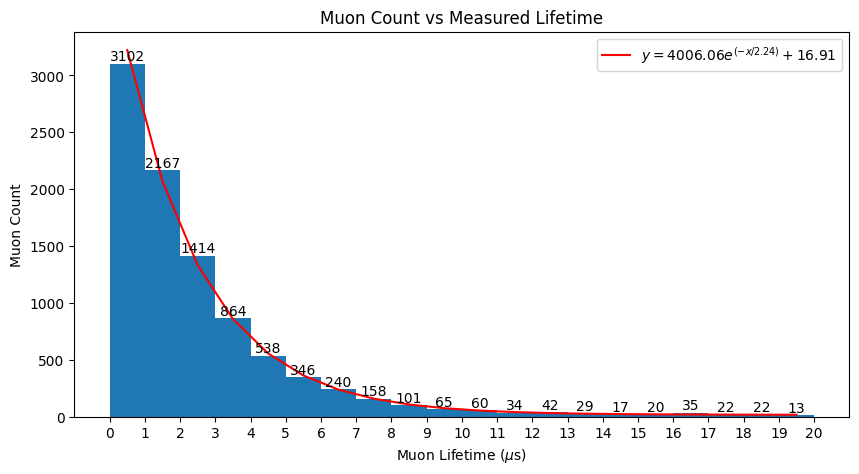

In [125]:
plt.figure(figsize=(10,5))
plt.xticks(np.linspace(0,20,21))
bins3,edges3,bars3 = plt.hist(data3/1000,bins=20,range=(0,20))
plt.bar_label(bars3)
plt.plot(bincenters3,fit_data3,color='r',label = r'$y={:.2f}e^{{(-x/{:.2f})}}+{:.2f}$'.format(params3[0],params3[2],params3[1]))
plt.legend()
plt.title('Muon Count vs Measured Lifetime')
plt.xlabel('Muon Lifetime ($\mu$s)')
plt.ylabel('Muon Count')
plt.savefig('Trial 3 Graph.png')
#files.download('Trial 3 Graph.png')
plt.show()

In [120]:
bincenters3 = (edges3[1:]+edges3[:-1])/2

In [121]:
error3 = np.sqrt(bins3)
params3,covariance3 = scipy.optimize.curve_fit(fitmodel,bincenters3,bins3,p0=None,sigma=error3,absolute_sigma=True)

In [122]:
fit_data3 = fitmodel(bincenters3,*params3)

In [123]:
print('N = ',np.sum(bins3))
print('Tau = {} +/- {}'.format(params3[2],covariance3[2,2]))

N =  9289.0
Tau = 2.2446732958688944 +/- 0.0008647084028430183


In [84]:
tau_measured3 = params3[2]
tau_stdev3 = np.sqrt(covariance3[2,2])
z_score3 = (tau_measured3-tau_obs)/np.sqrt(tau_stdev3**2+tau_obs_error**2)
z_score_exp = (tau_measured2-tau_exp)/np.sqrt(tau_stdev2**2+tau_exp_err**2)

In [76]:
cdf = stat.norm.cdf(z_score3,0,1)

print ("CDF = ",stat.norm.cdf(z_score3,0,1))

if cdf>0.5:
    pvalue_2t = 2*(1-cdf)
else :
    pvalue_2t=2*(cdf)

print ("two tailed p-value = ",pvalue_2t)

CDF =  0.9999926461049627
two tailed p-value =  1.4707790074508509e-05


In [85]:
#using regular lifetime
cdf = stat.norm.cdf(z_score_exp,0,1)

print ("CDF = ",stat.norm.cdf(z_score_exp,0,1))

if cdf>0.5:
    pvalue_2t = 2*(1-cdf)
else :
    pvalue_2t=2*(cdf)

print ("two tailed p-value = ",pvalue_2t)

CDF =  0.024084293517947764
two tailed p-value =  0.04816858703589553


In [124]:
chisquare = np.sum((bins3-fit_data3)**2/error3**2)
ndf = len(bins3)-len(params3)
print('chi-squared = {}, degrees of freedom = {}'.format(chisquare,ndf))
print('p-value =',1-stat.chi2.cdf(chisquare,df=ndf))

chi-squared = 33.6858818856752, degrees of freedom = 17
p-value = 0.009215304344350805
